In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
df = pd.read_csv("Statistik_Harian_per_Provinsi_COVID19_Indonesia_Rev.csv")

In [3]:
df.Tanggal = pd.to_datetime(df.Tanggal)

In [4]:
df = df.drop_duplicates()

In [5]:
# df.sort_values(['Provinsi','Tanggal'],inplace=True)

In [6]:
# df['Penambahan_Kasus'] = df.Kasus_Terkonfirmasi_Akumulatif - df.Kasus_Terkonfirmasi_Akumulatif.shift(1)

In [7]:
# df.loc[df.Provinsi == "Jambi"][['Tanggal','Kasus_Terkonfirmasi_Akumulatif','Penambahan_Kasus']]

In [8]:
prov = df.Provinsi.unique()

In [9]:
data = []

for p in prov:
    dt = df.loc[df.Provinsi == p]
    dt = dt.sort_values("Tanggal")
    dt['Penambahan_Kasus'] = dt.Kasus_Terkonfirmasi_Akumulatif - dt.Kasus_Terkonfirmasi_Akumulatif.shift(1)
    dt = dt[["Tanggal",'Kasus_Terkonfirmasi_Akumulatif']]
    dt.columns = ['Tanggal',p]
#     print(dt)
    data.append(dt)

In [10]:
from functools import reduce

In [11]:
df_all =  reduce(lambda left,right : pd.merge(left,right, on=["Tanggal"],how='outer'),data).fillna(0)

In [12]:
df_all.index = df_all.Tanggal

In [13]:
df_all.drop("Tanggal",inplace=True,axis=1)

In [14]:
df_all = df_all[['Aceh',                       'Bali',
                           'Banten',  'Kepulauan Bangka Belitung',
                         'Bengkulu', 'Daerah Istimewa Yogyakarta',
                      'DKI Jakarta',                      'Jambi',
                       'Jawa Barat',                'Jawa Tengah',
                       'Jawa Timur',           'Kalimantan Barat',
                 'Kalimantan Timur',          'Kalimantan Tengah',
               'Kalimantan Selatan',           'Kalimantan Utara',
                   'Kepulauan Riau',        'Nusa Tenggara Barat',
                 'Sumatera Selatan',             'Sumatera Barat',
                   'Sulawesi Utara',             'Sumatera Utara',
                'Sulawesi Tenggara',           'Sulawesi Selatan',
                  'Sulawesi Tengah',                    'Lampung',
                             'Riau',               'Maluku Utara',
                           'Maluku',                'Papua Barat',
                            'Papua',             'Sulawesi Barat',
              'Nusa Tenggara Timur',                  'Gorontalo']]

In [15]:
df_all

,Aceh,Bali,Banten,Kepulauan Bangka Belitung,Bengkulu,Daerah Istimewa Yogyakarta,DKI Jakarta,Jambi,Jawa Barat,Jawa Tengah,...,Sulawesi Tengah,Lampung,Riau,Maluku Utara,Maluku,Papua Barat,Papua,Sulawesi Barat,Nusa Tenggara Timur,Gorontalo
Tanggal,,,,,,,,,,,,,,,,,,,,,
2020-03-02 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-03 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-04 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-05 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-06 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-07 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-08 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-09 00:00:00+00:00,0.0,0.0,1.0,0.0,0.0,0.0,16.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-10 00:00:00+00:00,0.0,1.0,1.0,0.0,0.0,0.0,23.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
nobs = 4
df_train, df_test = df_all[0:-nobs], df_all[-nobs:]

In [17]:
df_test

,Aceh,Bali,Banten,Kepulauan Bangka Belitung,Bengkulu,Daerah Istimewa Yogyakarta,DKI Jakarta,Jambi,Jawa Barat,Jawa Tengah,...,Sulawesi Tengah,Lampung,Riau,Maluku Utara,Maluku,Papua Barat,Papua,Sulawesi Barat,Nusa Tenggara Timur,Gorontalo
Tanggal,,,,,,,,,,,,,,,,,,,,,
2020-09-22 00:00:00+00:00,3785.0,7996.0,4593.0,191.0,541.0,2312.0,64554.0,386.0,18077.0,19982.0,...,330.0,762.0,5701.0,2014.0,2652.0,1587.0,5249.0,530.0,332.0,2441.0
2020-09-23 00:00:00+00:00,3835.0,8126.0,4809.0,191.0,572.0,2375.0,65687.0,395.0,18593.0,20239.0,...,344.0,778.0,5889.0,2035.0,2654.0,1674.0,5387.0,540.0,349.0,2489.0
2020-09-24 00:00:00+00:00,3891.0,8245.0,4939.0,191.0,579.0,2397.0,66731.0,399.0,19397.0,20673.0,...,348.0,799.0,6120.0,2039.0,2654.0,1674.0,5653.0,546.0,367.0,2489.0
2020-09-25 00:00:00+00:00,3982.0,8389.0,5050.0,191.0,590.0,2458.0,67902.0,409.0,20131.0,21004.0,...,354.0,814.0,6315.0,2045.0,2654.0,1820.0,5763.0,567.0,388.0,2534.0


In [18]:


def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
#     print (adf)
    for key,value in dftest[4].items():
        adf['Critical Value (%s)'%key] = value
    
#     print (adf)
    p = adf['p-value']    
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")#apply adf test on the series

In [19]:
for col in df_all.columns:
    print("------------------")
    print(col)
    adf_test(df_train[col])
    print("------------------")


------------------
Aceh
 Series is Non-Stationary
------------------
------------------
Bali
 Series is Non-Stationary
------------------
------------------
Banten
 Series is Non-Stationary
------------------
------------------
Kepulauan Bangka Belitung
 Series is Non-Stationary
------------------
------------------
Bengkulu
 Series is Non-Stationary
------------------
------------------
Daerah Istimewa Yogyakarta
 Series is Non-Stationary
------------------
------------------
DKI Jakarta
 Series is Non-Stationary
------------------
------------------
Jambi
 Series is Non-Stationary
------------------
------------------
Jawa Barat
 Series is Non-Stationary
------------------
------------------
Jawa Tengah
 Series is Non-Stationary
------------------
------------------
Jawa Timur
 Series is Non-Stationary
------------------
------------------
Kalimantan Barat
 Series is Non-Stationary
------------------
------------------
Kalimantan Timur
 Series is Non-Stationary
------------------
---

In [20]:
df_differenced = df_train.diff().dropna()

In [21]:
for col in df_all.columns:
    print("------------------")
    print(col)
    adf_test(df_differenced[col])
    print("------------------")

------------------
Aceh
 Series is Non-Stationary
------------------
------------------
Bali
 Series is Non-Stationary
------------------
------------------
Banten
 Series is Non-Stationary
------------------
------------------
Kepulauan Bangka Belitung
 Series is Stationary
------------------
------------------
Bengkulu
 Series is Non-Stationary
------------------
------------------
Daerah Istimewa Yogyakarta
 Series is Non-Stationary
------------------
------------------
DKI Jakarta
 Series is Non-Stationary
------------------
------------------
Jambi
 Series is Non-Stationary
------------------
------------------
Jawa Barat
 Series is Non-Stationary
------------------
------------------
Jawa Tengah
 Series is Non-Stationary
------------------
------------------
Jawa Timur
 Series is Non-Stationary
------------------
------------------
Kalimantan Barat
 Series is Stationary
------------------
------------------
Kalimantan Timur
 Series is Non-Stationary
------------------
-----------

In [22]:
df_differenced2 = df_differenced.diff().dropna()

In [23]:
for col in df_all.columns:
    print("------------------")
    print(col)
    adf_test(df_differenced2[col])
    print("------------------")

------------------
Aceh
 Series is Stationary
------------------
------------------
Bali
 Series is Stationary
------------------
------------------
Banten
 Series is Non-Stationary
------------------
------------------
Kepulauan Bangka Belitung
 Series is Stationary
------------------
------------------
Bengkulu
 Series is Stationary
------------------
------------------
Daerah Istimewa Yogyakarta
 Series is Stationary
------------------
------------------
DKI Jakarta
 Series is Stationary
------------------
------------------
Jambi
 Series is Stationary
------------------
------------------
Jawa Barat
 Series is Stationary
------------------
------------------
Jawa Tengah
 Series is Stationary
------------------
------------------
Jawa Timur
 Series is Stationary
------------------
------------------
Kalimantan Barat
 Series is Stationary
------------------
------------------
Kalimantan Timur
 Series is Stationary
------------------
------------------
Kalimantan Tengah
 Series is Sta

In [24]:
df_differenced3 = df_differenced2.diff().dropna()

In [25]:
for col in df_all.columns:
    print("------------------")
    print(col)
    adf_test(df_differenced3[col])
    print("------------------")

------------------
Aceh
 Series is Stationary
------------------
------------------
Bali
 Series is Stationary
------------------
------------------
Banten
 Series is Stationary
------------------
------------------
Kepulauan Bangka Belitung
 Series is Stationary
------------------
------------------
Bengkulu
 Series is Stationary
------------------
------------------
Daerah Istimewa Yogyakarta
 Series is Stationary
------------------
------------------
DKI Jakarta
 Series is Stationary
------------------
------------------
Jambi
 Series is Stationary
------------------
------------------
Jawa Barat
 Series is Stationary
------------------
------------------
Jawa Tengah
 Series is Stationary
------------------
------------------
Jawa Timur
 Series is Stationary
------------------
------------------
Kalimantan Barat
 Series is Stationary
------------------
------------------
Kalimantan Timur
 Series is Stationary
------------------
------------------
Kalimantan Tengah
 Series is Station

In [26]:
model = VAR(df_differenced2)
results = model.fit(maxlags=3, ic='aic')
results.summary()

/home/fajara/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 15, Oct, 2020
Time:                     22:53:54
--------------------------------------------------------------------
No. of Equations:         34.0000    BIC:                    219.342
Nobs:                     191.000    HQIC:                   183.865
Log likelihood:          -20965.0    FPE:                1.76834e+71
AIC:                      159.711    Det(Omega_mle):     7.56642e+64
--------------------------------------------------------------------
Results for equation Aceh
                                   coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------
const                                 1.979758         2.326613            0.851           0.395
L1.Aceh                              -0.353748         0.221706           -1.596           0.1

In [27]:
# lag_order = results.k_ar
# results.forecast(df_all.values[-lag_order:], 1)

In [28]:
# forecasting
pred = results.forecast(results.y, steps=nobs)
df_forecast = pd.DataFrame(pred, index=df_all.index[-nobs:], columns=df_all.columns + '_1d')
df_forecast.tail()# inverting transformation

/home/fajara/.local/lib/python3.6/site-packages/statsmodels/base/wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


,Aceh_1d,Bali_1d,Banten_1d,Kepulauan Bangka Belitung_1d,Bengkulu_1d,Daerah Istimewa Yogyakarta_1d,DKI Jakarta_1d,Jambi_1d,Jawa Barat_1d,Jawa Tengah_1d,...,Sulawesi Tengah_1d,Lampung_1d,Riau_1d,Maluku Utara_1d,Maluku_1d,Papua Barat_1d,Papua_1d,Sulawesi Barat_1d,Nusa Tenggara Timur_1d,Gorontalo_1d
Tanggal,,,,,,,,,,,,,,,,,,,,,
2020-09-22 00:00:00+00:00,-31.116582,-33.936366,-41.288617,9.376370,-2.231117,2.308263,-33.669659,11.531920,-274.644710,27.381121,...,11.705106,42.039490,29.073254,-7.975380,32.351476,33.640325,46.104699,6.976038,-0.181382,-28.431353
2020-09-23 00:00:00+00:00,127.312279,18.729050,-17.601305,3.633968,2.120819,8.428933,-181.455633,14.821801,-372.906707,171.069361,...,-10.500317,-41.946626,46.481595,-44.270990,-84.974725,8.400723,-38.536291,2.428303,8.952989,75.598581
2020-09-24 00:00:00+00:00,-76.697523,-99.797619,9.318653,-13.645550,17.144195,-29.721348,-306.630438,-29.665150,66.096644,-222.787627,...,16.505004,5.795316,-94.377646,39.408561,-1.232380,-41.651885,4.326754,-1.770316,-6.743520,4.717707
2020-09-25 00:00:00+00:00,63.737753,109.236765,83.912562,-7.361071,12.662479,40.553910,1007.482209,5.434680,591.112715,347.828061,...,-13.001832,37.416747,256.305986,28.426451,94.754820,75.465885,171.961768,-22.291074,22.073862,-56.747909


In [29]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_1d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc# show inverted results in a dataframe
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        

In [30]:
fore = [col for col in df_results.columns if 'forecast' in col]
df_results[fore]

,Aceh_forecast,Bali_forecast,Banten_forecast,Kepulauan Bangka Belitung_forecast,Bengkulu_forecast,Daerah Istimewa Yogyakarta_forecast,DKI Jakarta_forecast,Jambi_forecast,Jawa Barat_forecast,Jawa Tengah_forecast,...,Sulawesi Tengah_forecast,Lampung_forecast,Riau_forecast,Maluku Utara_forecast,Maluku_forecast,Papua Barat_forecast,Papua_forecast,Sulawesi Barat_forecast,Nusa Tenggara Timur_forecast,Gorontalo_forecast
Tanggal,,,,,,,,,,,,,,,,,,,,,
2020-09-22 00:00:00+00:00,3761.883418,7993.063634,4543.711383,200.376370,533.768883,2311.308263,64636.330341,397.531920,17907.355290,20019.381121,...,333.705106,790.039490,5637.073254,2022.024620,2696.351476,1570.640325,5249.104699,512.976038,320.818618,2410.568647
2020-09-23 00:00:00+00:00,3957.079116,8116.856319,4605.821460,213.386708,533.658584,2386.045460,65773.205049,423.885642,17939.803874,20455.831602,...,335.909894,800.132354,5872.628103,1988.778249,2692.728228,1633.681373,5283.673108,523.380379,329.590225,2459.735874
2020-09-24 00:00:00+00:00,4075.577290,8140.851384,4677.250191,212.751496,550.692480,2431.061308,66603.449320,420.574213,18038.349101,20669.494457,...,354.619687,816.020534,6013.805306,1994.940440,2687.872600,1655.070536,5322.568270,532.014404,331.618312,2513.620809
2020-09-25 00:00:00+00:00,4257.813217,8274.083215,4832.591484,204.755213,580.388855,2516.631066,68441.175799,422.697465,18728.007043,21230.985373,...,360.327649,869.325461,6411.288496,2029.529081,2777.771792,1751.925583,5533.425201,518.357355,355.720262,2510.757834


In [31]:
df_test

,Aceh,Bali,Banten,Kepulauan Bangka Belitung,Bengkulu,Daerah Istimewa Yogyakarta,DKI Jakarta,Jambi,Jawa Barat,Jawa Tengah,...,Sulawesi Tengah,Lampung,Riau,Maluku Utara,Maluku,Papua Barat,Papua,Sulawesi Barat,Nusa Tenggara Timur,Gorontalo
Tanggal,,,,,,,,,,,,,,,,,,,,,
2020-09-22 00:00:00+00:00,3785.0,7996.0,4593.0,191.0,541.0,2312.0,64554.0,386.0,18077.0,19982.0,...,330.0,762.0,5701.0,2014.0,2652.0,1587.0,5249.0,530.0,332.0,2441.0
2020-09-23 00:00:00+00:00,3835.0,8126.0,4809.0,191.0,572.0,2375.0,65687.0,395.0,18593.0,20239.0,...,344.0,778.0,5889.0,2035.0,2654.0,1674.0,5387.0,540.0,349.0,2489.0
2020-09-24 00:00:00+00:00,3891.0,8245.0,4939.0,191.0,579.0,2397.0,66731.0,399.0,19397.0,20673.0,...,348.0,799.0,6120.0,2039.0,2654.0,1674.0,5653.0,546.0,367.0,2489.0
2020-09-25 00:00:00+00:00,3982.0,8389.0,5050.0,191.0,590.0,2458.0,67902.0,409.0,20131.0,21004.0,...,354.0,814.0,6315.0,2045.0,2654.0,1820.0,5763.0,567.0,388.0,2534.0


In [32]:
model = VAR(df_differenced3)
results = model.fit(maxlags=3, ic='aic')
results.summary()

/home/fajara/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 15, Oct, 2020
Time:                     22:53:55
--------------------------------------------------------------------
No. of Equations:         34.0000    BIC:                    220.042
Nobs:                     190.000    HQIC:                   184.438
Log likelihood:          -20882.8    FPE:                3.10335e+71
AIC:                      160.194    Det(Omega_mle):     1.24725e+65
--------------------------------------------------------------------
Results for equation Aceh
                                   coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------
const                                -0.233115         2.463697           -0.095           0.925
L1.Aceh                              -0.928282         0.215464           -4.308           0.0

In [33]:
# df_all

In [34]:
pred = results.forecast(results.y, steps=nobs)
df_forecast = pd.DataFrame(pred, index=df_all.index[-nobs:], columns=df_all.columns + '_2d')
df_forecast.tail()# inverting transformation

,Aceh_2d,Bali_2d,Banten_2d,Kepulauan Bangka Belitung_2d,Bengkulu_2d,Daerah Istimewa Yogyakarta_2d,DKI Jakarta_2d,Jambi_2d,Jawa Barat_2d,Jawa Tengah_2d,...,Sulawesi Tengah_2d,Lampung_2d,Riau_2d,Maluku Utara_2d,Maluku_2d,Papua Barat_2d,Papua_2d,Sulawesi Barat_2d,Nusa Tenggara Timur_2d,Gorontalo_2d
Tanggal,,,,,,,,,,,,,,,,,,,,,
2020-09-22 00:00:00+00:00,-177.312853,-232.895499,25.332213,12.357658,-20.886153,-27.716210,-1293.846501,25.621137,-574.105072,-288.740823,...,19.889833,20.214898,-61.273271,17.993662,-57.609140,0.714790,-62.149592,21.884328,8.345360,26.624391
2020-09-23 00:00:00+00:00,270.722715,277.073865,15.095513,6.364317,33.491396,80.381432,1164.799581,12.594154,259.994018,709.902701,...,-13.380752,-47.182231,296.490709,-65.345470,-61.551305,57.057017,-23.588018,13.788918,2.940235,118.120082
2020-09-24 00:00:00+00:00,-139.041362,-81.058042,21.751335,-32.443420,11.115029,-50.973914,-93.724435,-48.905573,239.543482,-407.040209,...,43.266130,20.203025,-74.785315,70.028233,122.770576,-52.952964,102.039146,-18.416429,-22.461216,-116.527203
2020-09-25 00:00:00+00:00,28.644862,173.384324,52.713270,2.048441,-9.580417,43.861484,776.828518,20.771680,295.797779,338.118077,...,-46.312645,58.190436,218.090892,64.609526,39.755407,92.348065,217.017484,-26.175204,23.180233,-17.142780


In [35]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:
        df_fc[str(col)+'_2d'] = (df_train[col].iloc[-2]-df_train[col].iloc[-3]) + df_fc[str(col)+'_2d'].cumsum()
        df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
        # Roll back 2nd Diff
#         if second_diff:
#             df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_1d'].cumsum()
#         # Roll back 1st Diff
#         df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc# show inverted results in a dataframe


df_results = invert_transformation(df_train, df_forecast)   

In [36]:
fore = [col for col in df_results.columns if 'forecast' in col]
df_results[fore]

,Aceh_forecast,Bali_forecast,Banten_forecast,Kepulauan Bangka Belitung_forecast,Bengkulu_forecast,Daerah Istimewa Yogyakarta_forecast,DKI Jakarta_forecast,Jambi_forecast,Jawa Barat_forecast,Jawa Tengah_forecast,...,Sulawesi Tengah_forecast,Lampung_forecast,Riau_forecast,Maluku Utara_forecast,Maluku_forecast,Papua Barat_forecast,Papua_forecast,Sulawesi Barat_forecast,Nusa Tenggara Timur_forecast,Gorontalo_forecast
Tanggal,,,,,,,,,,,,,,,,,,,,,
2020-09-22 00:00:00+00:00,3683.687147,7915.104501,4789.332213,203.357658,521.113847,2351.283790,64514.153499,425.621137,18034.894928,20006.259177,...,364.889833,781.214898,5844.726729,2047.993662,2621.390860,1597.714790,5190.850408,546.884328,335.345360,2525.624391
2020-09-23 00:00:00+00:00,3834.784155,8107.387368,5334.092152,234.437292,524.832938,2580.232801,66719.260077,517.457565,18680.678802,20982.680233,...,438.288748,810.462464,6774.670898,2037.635515,2523.621274,1797.201387,5169.963204,643.441901,366.976316,2818.993256
2020-09-24 00:00:00+00:00,4008.249663,8383.790560,6120.031153,251.795482,558.272302,2880.873119,69839.595301,612.603710,19678.895103,22276.222959,...,584.462875,845.945722,8163.047189,2049.953793,2444.461818,2061.506829,5215.377537,776.256292,393.431652,3200.579390
2020-09-25 00:00:00+00:00,4232.728533,8917.698400,7199.862485,257.480669,611.851523,3297.066230,74651.987687,731.831254,21325.341611,24225.005433,...,757.099569,945.855109,10227.946496,2149.558021,2423.667899,2482.979178,5544.110889,919.152295,437.891600,3653.240015


In [37]:
df_test

,Aceh,Bali,Banten,Kepulauan Bangka Belitung,Bengkulu,Daerah Istimewa Yogyakarta,DKI Jakarta,Jambi,Jawa Barat,Jawa Tengah,...,Sulawesi Tengah,Lampung,Riau,Maluku Utara,Maluku,Papua Barat,Papua,Sulawesi Barat,Nusa Tenggara Timur,Gorontalo
Tanggal,,,,,,,,,,,,,,,,,,,,,
2020-09-22 00:00:00+00:00,3785.0,7996.0,4593.0,191.0,541.0,2312.0,64554.0,386.0,18077.0,19982.0,...,330.0,762.0,5701.0,2014.0,2652.0,1587.0,5249.0,530.0,332.0,2441.0
2020-09-23 00:00:00+00:00,3835.0,8126.0,4809.0,191.0,572.0,2375.0,65687.0,395.0,18593.0,20239.0,...,344.0,778.0,5889.0,2035.0,2654.0,1674.0,5387.0,540.0,349.0,2489.0
2020-09-24 00:00:00+00:00,3891.0,8245.0,4939.0,191.0,579.0,2397.0,66731.0,399.0,19397.0,20673.0,...,348.0,799.0,6120.0,2039.0,2654.0,1674.0,5653.0,546.0,367.0,2489.0
2020-09-25 00:00:00+00:00,3982.0,8389.0,5050.0,191.0,590.0,2458.0,67902.0,409.0,20131.0,21004.0,...,354.0,814.0,6315.0,2045.0,2654.0,1820.0,5763.0,567.0,388.0,2534.0


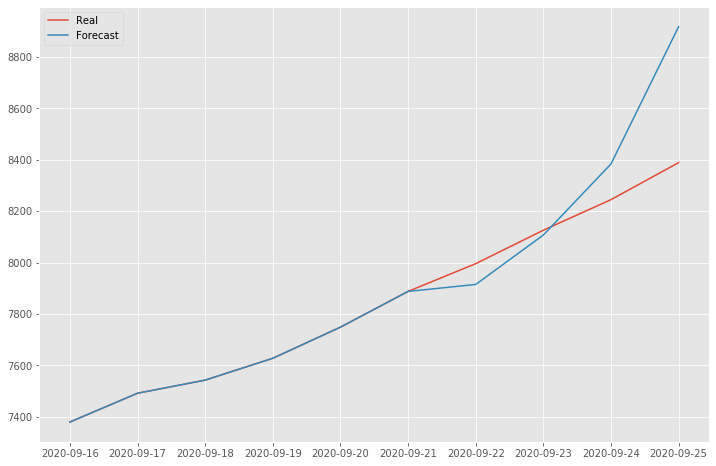

In [69]:
fig = plt.figure(figsize=(12, 8))

forec_bali = df_results[['Bali_forecast']]
forec_bali.columns = ["Bali"]
forec_bali = pd.concat([df_train['Bali'].to_frame(),forec_bali],axis=0)
# plt.plot(df_train[-11:].index, df_train[-11:]['Bali'])
plt.plot(df_all['Bali'][-10:].index, df_all['Bali'][-10:],label='Real')
plt.plot(forec_bali[-10:].index, forec_bali['Bali'][-10:],label='Forecast')

# plt.xlim(0,18000)
# plt.ylim(0,30)
plt.legend()
plt.show()

,Bali
Tanggal,
2020-03-02 00:00:00+00:00,0.000000
2020-03-03 00:00:00+00:00,0.000000
2020-03-04 00:00:00+00:00,0.000000
2020-03-05 00:00:00+00:00,0.000000
2020-03-06 00:00:00+00:00,0.000000
2020-03-07 00:00:00+00:00,0.000000
2020-03-08 00:00:00+00:00,0.000000
2020-03-09 00:00:00+00:00,0.000000
2020-03-10 00:00:00+00:00,1.000000


In [41]:
# df_forecast["Bali_2d"]

In [42]:
# check  = df_all["Bali"].to_frame()

In [43]:
# check

In [44]:
# import numpy as np

In [45]:
# check['active_log'] = np.log(check['Bali'])
# check['active_log_diff'] = check['active_log'] - check['active_log'].shift(1)

In [46]:
# check = check.replace([np.inf, -np.inf], np.nan)
# check = check.fillna(0)

In [47]:
# adf_test(check['active_log'])

In [48]:
# check